In [1]:
#  Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os

import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import bokeh
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)  
import plotly as py
import plotly.graph_objs as go

from wordcloud import WordCloud, STOPWORDS
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
data=pd.read_csv("master.csv")

In [3]:
data.isnull().sum()                   #  count of null values
data.dropna(inplace=True)             #  drop rows with null values
data.isnull().sum()                   #  count of null values

#  check for DUPLICATEs
data.duplicated().sum()               #  count of duplicate values
#data.drop_duplicates(inplace = True)  #  drop rows with null values

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8364 entries, 72 to 27819
Data columns (total 12 columns):
country               8364 non-null object
year                  8364 non-null int64
sex                   8364 non-null object
age                   8364 non-null object
suicides_no           8364 non-null int64
population            8364 non-null int64
suicides/100k pop     8364 non-null float64
country-year          8364 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     8364 non-null object
gdp_per_capita ($)    8364 non-null int64
generation            8364 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 849.5+ KB


suicides/100k pop     1.000000
sex                   0.406362
age                   0.361738
generation            0.346142
gdp_per_capita ($)   -0.002339
Name: suicides/100k pop, dtype: float64

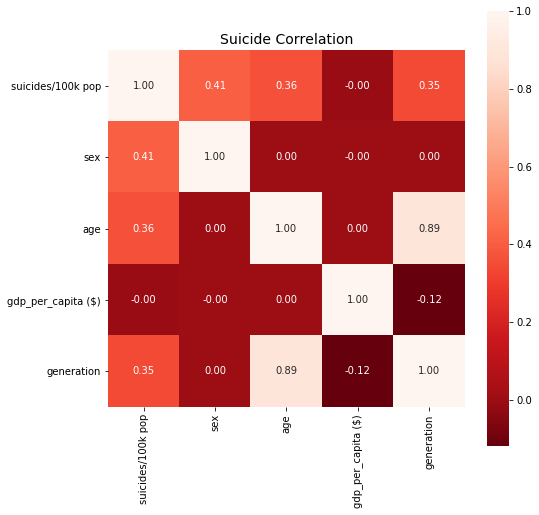

In [4]:
heatmapData = data.drop(['country','suicides_no',' gdp_for_year ($) ', 'population','year'], axis=1)

# rearrange column name 
heatmapData = data[['suicides/100k pop', 'sex', 'age', 'gdp_per_capita ($)','generation']]

#  map sex, age, generation to the plot

heatmapData['sex'] = heatmapData['sex'].map({'female':0,'male':1})

data['age'].groupby(data['generation']).value_counts()

heatmapData['age'] = heatmapData['age'].map({
        '5-14 years':0,'15-24 years':1,'25-34 years':2,
        '35-54 years':3,'55-74 years':4,'75+ years':5})
heatmapData['generation'] = heatmapData['generation'].map({
        'Generation Z':0,'Millenials':1,'Generation X':2,
        'Boomers':3,'Silent':4,'G.I. Generation':5})

#  Correlations - OVERALL
dataCorr = heatmapData.corr()
plt.figure(figsize=(8,8))
plt.title('Suicide Correlation', fontsize=14)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'Reds_r')

dataCorr['suicides/100k pop'].sort_values(ascending=False)

Correlation - MALE:
 suicides/100k pop     1.000000
age                   0.475876
generation            0.447475
gdp_per_capita ($)   -0.020743
Name: suicides/100k pop, dtype: float64
Correlation - FEMALE:
 suicides/100k pop     1.000000
generation            0.382239
age                   0.370834
gdp_per_capita ($)    0.058977
Name: suicides/100k pop, dtype: float64


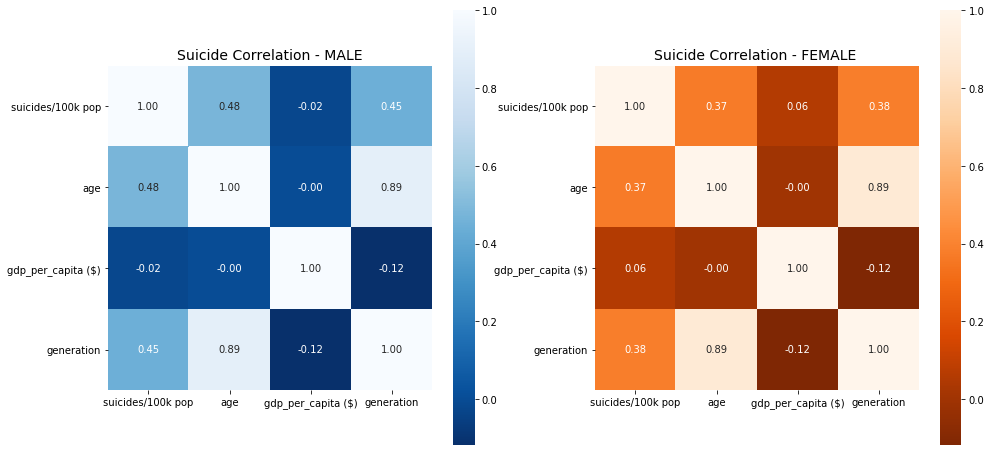

In [5]:
#  Correlation MALE - filter dataframe for male/female

# male data
heatmapMale   = heatmapData[(heatmapData['sex'] == 1)] 

heatmapMaleCorr = heatmapMale.drop(["sex"], axis=1).corr()        
print("Correlation - MALE:\n", heatmapMaleCorr['suicides/100k pop'].sort_values(ascending=False))

# female data
heatmapFemale = heatmapData[(heatmapData['sex'] == 0)]  

heatmapFemaleCorr = heatmapFemale.drop(["sex"], axis=1).corr()    
print("Correlation - FEMALE:\n", heatmapFemaleCorr['suicides/100k pop'].sort_values(ascending=False))

#  plot heatmaps
fig = plt.figure(figsize=(16,8))
fig.add_subplot(121)
plt.title('Suicide Correlation - MALE', fontsize=14)
sns.heatmap(heatmapMaleCorr, annot=True, fmt='.2f', square=True, cmap = 'Blues_r')
fig.add_subplot(122)
plt.title('Suicide Correlation - FEMALE ', fontsize=14)
sns.heatmap(heatmapFemaleCorr, annot=True, fmt='.2f', square=True, cmap = 'Oranges_r')
plt.show()

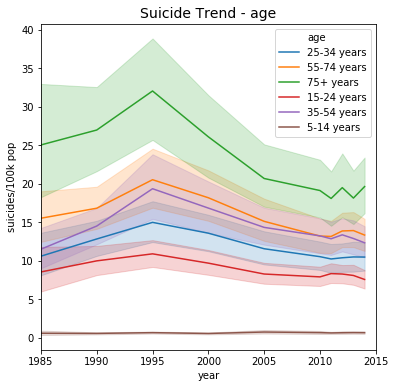

In [6]:
#  SUICIDES vs YEAR - lineplot
plt.figure(figsize=(6,6))
plt.title('Suicide Trend - age', fontsize=14)
plt.xlim(1985,2015)     # disregarding 2016
sns.lineplot(data=data,x='year',y='suicides/100k pop',hue='age')

In [7]:
# Suicide Probability

data=pd.read_csv("master.csv")

data.isnull().sum()                   #  count of null values
data.dropna(inplace=True)             #  drop rows with null values
data.isnull().sum()                   #  count of null values

#  check for DUPLICATEs
data.duplicated().sum()               #  count of duplicate values

age_groups = data['age'].unique()
# sorted string values according to the float key
age_groups = sorted(age_groups,key=lambda x: float(x[0:1])) 
age_groups.insert(0, age_groups.pop(4))

suicides = [[data[data['age']==age]['suicides_no'].sum()] for age in age_groups]
suicides = np.array(suicides).reshape(len(suicides))
suicides = suicides/sum(suicides)

data = [go.Bar(
            x=age_groups,
            y=suicides
    )]

layout = go.Layout(
    title = 'Yearly Suicide Probabilities',
    xaxis = dict(
        title = 'Age Group'
    )
)
    
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [8]:
# Suicide Probability

data=pd.read_csv("master.csv")


suicides_male = [[data[data['age']==age][data['sex']=='male']['suicides_no'].sum()] for age in age_groups]
suicides_male = np.array(suicides_male).reshape(len(suicides))
suicides_male = suicides_male/sum(suicides_male) 

suicides_female = [[data[data['age']==age][data['sex']=='female']['suicides_no'].sum()] for age in age_groups]
suicides_female = np.array(suicides_female).reshape(len(suicides))
suicides_female = suicides_female/sum(suicides_female) 

trace1 = go.Bar(
    x=age_groups,
    y=suicides_male,
    name='Male'
)
trace2 = go.Bar(
    x=age_groups,
    y=suicides_female,
    name='Female'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title = 'Yearly Suicide Probabilities',
    xaxis = dict(
        title = 'Age Group')
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

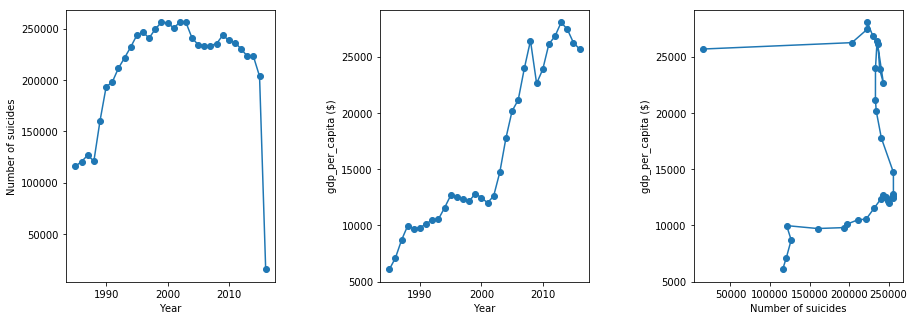

In [9]:
# Data exploration

data=pd.read_csv("master.csv")

years = sorted(data.year.unique())
total_suicides = []
avg_gdp = []
for year in sorted(years):
    total_suicides.append(data[data['year']==year]['suicides_no'].sum())
    avg_gdp.append(data[data['year']==year]['gdp_per_capita ($)'].mean())

fig , (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5)) 
ax1.plot(years,total_suicides,'-o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of suicides')


ax2.plot(years, avg_gdp,'-o')
ax2.set_xlabel('Year')
ax2.set_ylabel('gdp_per_capita ($)')

ax3.plot(total_suicides, avg_gdp,'-o')
ax3.set_xlabel('Number of suicides')
ax3.set_ylabel('gdp_per_capita ($)')
fig.subplots_adjust(wspace=0.5)

In [10]:
# Suicide trend in European countries

countries = ['Ireland', 'United Kingdom','Italy','Spain','France', 'Germany']
total_by_country = data.groupby(['country','year']).sum()['suicides_no']
relative_by_country = data.groupby(['country','year']).sum()['suicides/100k pop']

data=[go.Scatter(
    x = years,
    y = total_by_country[i].values,
    mode= 'lines+markers',
    name = i
) for i in countries]

data2=[go.Scatter(
    x = years,
    y = relative_by_country[i].values,
    mode= 'lines+markers',
    xaxis='x2',
    yaxis='y2',
    name = i
) for i in countries]


layout = dict(
    title = 'Suicide trend in European countries',
    width = 700,
    height = 700,
    xaxis=dict(title='Years'),
    yaxis=dict(title='Count')
   
)


fig = dict( data=data, layout=layout )
py.offline.iplot( fig, validate=False)

In [11]:
# Suicide rate by generation

data=pd.read_csv("master.csv")

generations = pd.unique(data['generation']) 

gen_suicide = [data[data['generation']== gen]['suicides_no'].sum() for gen in generations] 

trace1 = go.Bar(
    x=gen_suicide,
    y=generations,
    orientation = 'h',
    name='Generational suicides'
)


data = [trace1]
layout = go.Layout(
    barmode='group',
    title = 'Suicide rate by generation'
)

fig = dict( data=data, layout=layout )
py.offline.iplot( fig, validate=False)

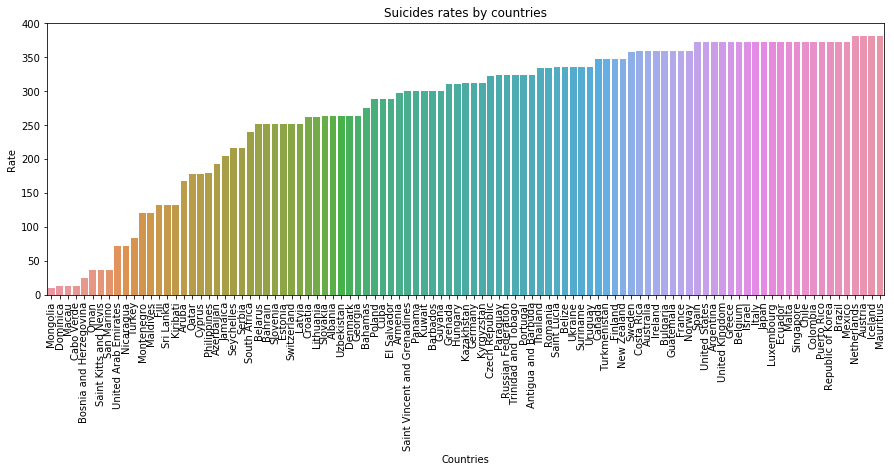

In [12]:
#Suicides rates by countries
data=pd.read_csv("master.csv")

countries = list(data.country.unique())
numbers = {}
for i in countries:
    numbers[i] = 0
for i in data.country:
    numbers[i] += 1

data_by_countries = pd.DataFrame({"Countries":list(numbers.keys()),"Rate":list(numbers.values())})
gec = (data_by_countries["Rate"].sort_values(ascending = True)).index.values
data_by_countries= data_by_countries.reindex(gec)
plt.figure(figsize = (15,5))
ax = sns.barplot(x = data_by_countries.Countries,y = data_by_countries.Rate).set_title('Suicides rates by countries')
plt.xticks(rotation = 90)
# plt.title='neo'
plt.show()

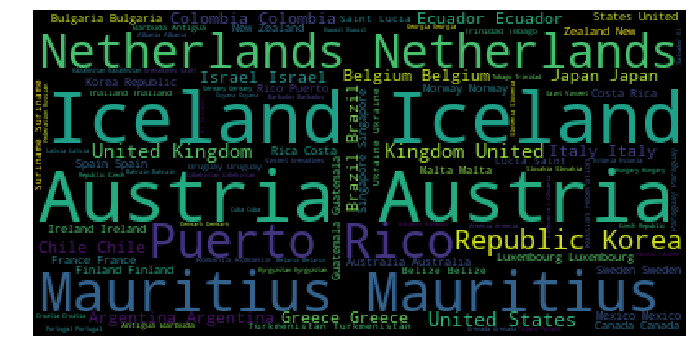

In [14]:
#suicide rates by country with wordcloud

data=pd.read_csv("master.csv")

country_motive = data['country'].str.lower().str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(country_motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords)

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black').generate(" ".join(data.country))

plt.imshow(wordcloud)
plt.axis("off")
fig=plt.gcf()
fig.set_size_inches(14,6)
# plt.title('Countries with high suicide rate')
plt.show()